In [10]:
dfv1=pd.read_csv("https://github.com/Vakiti/SrijaVakiti_ML_Exam_2023/raw/main/skincare_dataset.csv")
dfv1

,ID,Annual_Earnings,Credit_Score,User_Age,Skincare_Preference
0,1,65795,789,25,Moisturizers
1,2,50860,774,36,Makeup
2,3,88158,789,39,Lip_Balms
3,4,94732,650,26,Moisturizers
4,5,61284,707,40,Cleansers
5,6,56265,654,30,Face_Masks
6,7,66850,663,26,Face_Masks
7,8,87194,730,24,Face_Masks
8,9,71962,650,28,Lip_Balms
9,10,97191,734,44,Cleansers


## 1. Determine if a User should get a credit card (yes or no):

This will be framed as a binary classification problem, where the target variable is the user's eligibility for a credit card. Logistic Regression will be used for this problem.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Determine if a User should get a credit card
credit_threshold = 700
dfv1['Eligible_for_Credit_Card'] = dfv1['Credit_Score'] > credit_threshold

In [27]:
# Perform one-hot encoding for skincare categories
df_encoded = pd.get_dummies(dfv1, columns=['Skincare_Preference'], prefix='Skincare')

df_encoded


,ID,Annual_Earnings,Credit_Score,User_Age,Eligible_for_Credit_Card,Skincare_Cleansers,Skincare_Face_Masks,Skincare_Lip_Balms,Skincare_Makeup,Skincare_Moisturizers,Skincare_Serums
0,1,65795,789,25,True,0,0,0,0,1,0
1,2,50860,774,36,True,0,0,0,1,0,0
2,3,88158,789,39,True,0,0,1,0,0,0
3,4,94732,650,26,False,0,0,0,0,1,0
4,5,61284,707,40,True,1,0,0,0,0,0
5,6,56265,654,30,False,0,1,0,0,0,0
6,7,66850,663,26,False,0,1,0,0,0,0
7,8,87194,730,24,True,0,1,0,0,0,0
8,9,71962,650,28,False,0,0,1,0,0,0
9,10,97191,734,44,True,1,0,0,0,0,0


In [30]:
# Prepare data for classification
X_classification = df_encoded.loc[:, ~df_encoded.columns.isin(['Eligible_for_Credit_Card'])]
y_classification = df_encoded['Eligible_for_Credit_Card']

# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)
# Save training and testing datasets for credit card eligibility classification
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_frame('Eligible_for_Credit_Card').to_csv('y_train.csv', index=False)
y_test.to_frame('Eligible_for_Credit_Card').to_csv('y_test.csv', index=False)


Credit Card Eligibility Classifier Accuracy: 0.67
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         4
        True       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



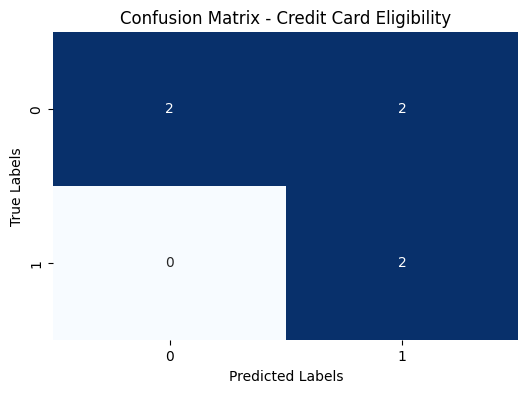

In [31]:
# Train a Logistic Regression classifier for credit card eligibility
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy_classification = accuracy_score(y_test, y_pred)
print(f'Credit Card Eligibility Classifier Accuracy: {accuracy_classification:.2f}')

# Print classification report for detailed performance metrics
print(classification_report(y_test, y_pred))

# Visualize confusion matrix for credit card eligibility
cm_classification = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_classification, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Credit Card Eligibility')
plt.show()

In [44]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Train a Logistic Regression classifier
classifier_logistic = LogisticRegression(random_state=42)
classifier_logistic.fit(X_train, y_train)

# Train a Support Vector Machine (SVM) classifier
classifier_svm = SVC(random_state=42)
classifier_svm.fit(X_train, y_train)

# Train a Decision Tree Classifier
classifier_decision_tree = DecisionTreeClassifier(random_state=42)
classifier_decision_tree.fit(X_train, y_train)

# Make predictions on the test set for all classifiers
y_pred_logistic = classifier_logistic.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)
y_pred_decision_tree = classifier_decision_tree.predict(X_test)

# Evaluate the classifiers
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Display results
print(f'Support Vector Machine (SVM) Accuracy: {accuracy_svm:.2f}')
print(f'Decision Tree Accuracy: {accuracy_decision_tree:.2f}')


Support Vector Machine (SVM) Accuracy: 0.33
Decision Tree Accuracy: 1.00


In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score


# Function to generate and display classification report
def generate_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, target_names=['Not Eligible', 'Eligible'], output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(f"Classification Report - {title}:\n{df_report}")

# Generate classification reports for each classifier
generate_classification_report(y_test, y_pred_logistic, 'Logistic Regression')
generate_classification_report(y_test, y_pred_svm, 'Support Vector Machine (SVM)\n')
generate_classification_report(y_test, y_pred_decision_tree, '\nDecision Tree Classifier')

Classification Report - Logistic Regression:
              precision    recall  f1-score   support
Not Eligible   1.000000  0.500000  0.666667  4.000000
Eligible       0.500000  1.000000  0.666667  2.000000
accuracy       0.666667  0.666667  0.666667  0.666667
macro avg      0.750000  0.750000  0.666667  6.000000
weighted avg   0.833333  0.666667  0.666667  6.000000
Classification Report - Support Vector Machine (SVM)
:
              precision    recall  f1-score   support
Not Eligible   0.500000  0.250000  0.333333  4.000000
Eligible       0.250000  0.500000  0.333333  2.000000
accuracy       0.333333  0.333333  0.333333  0.333333
macro avg      0.375000  0.375000  0.333333  6.000000
weighted avg   0.416667  0.333333  0.333333  6.000000
Classification Report - 
Decision Tree Classifier:
              precision  recall  f1-score  support
Not Eligible        1.0     1.0       1.0      4.0
Eligible            1.0     1.0       1.0      2.0
accuracy            1.0     1.0       1.0      1

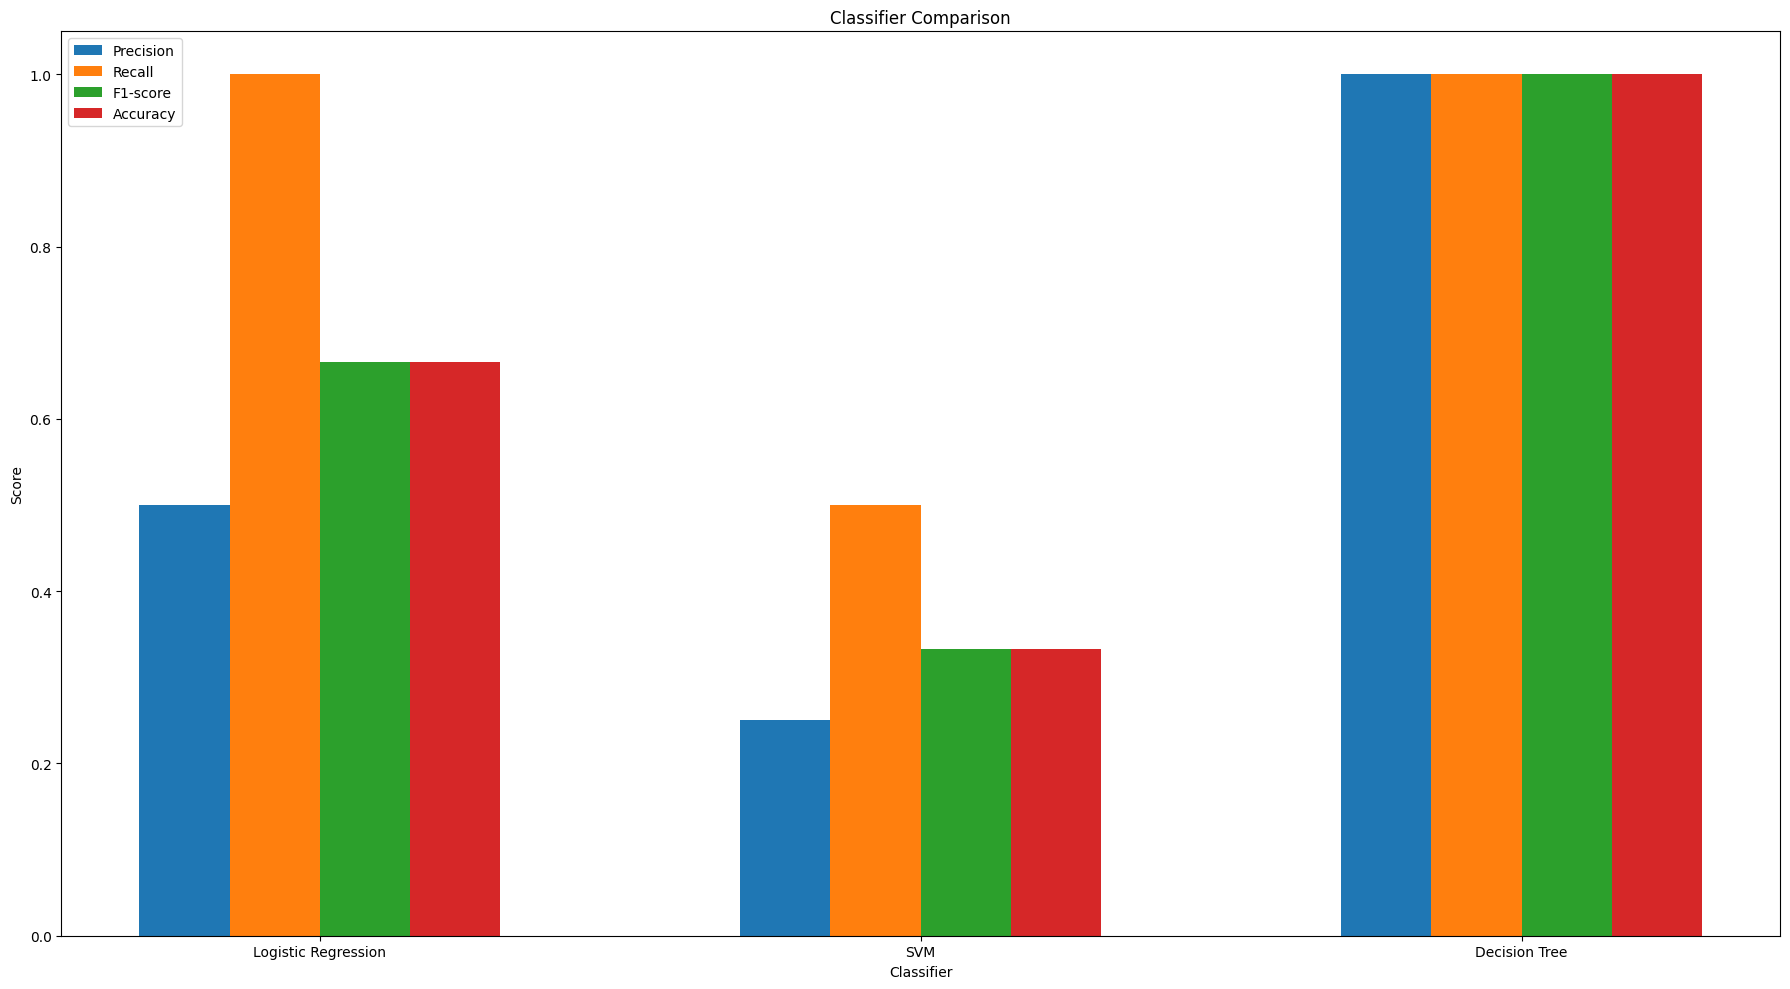

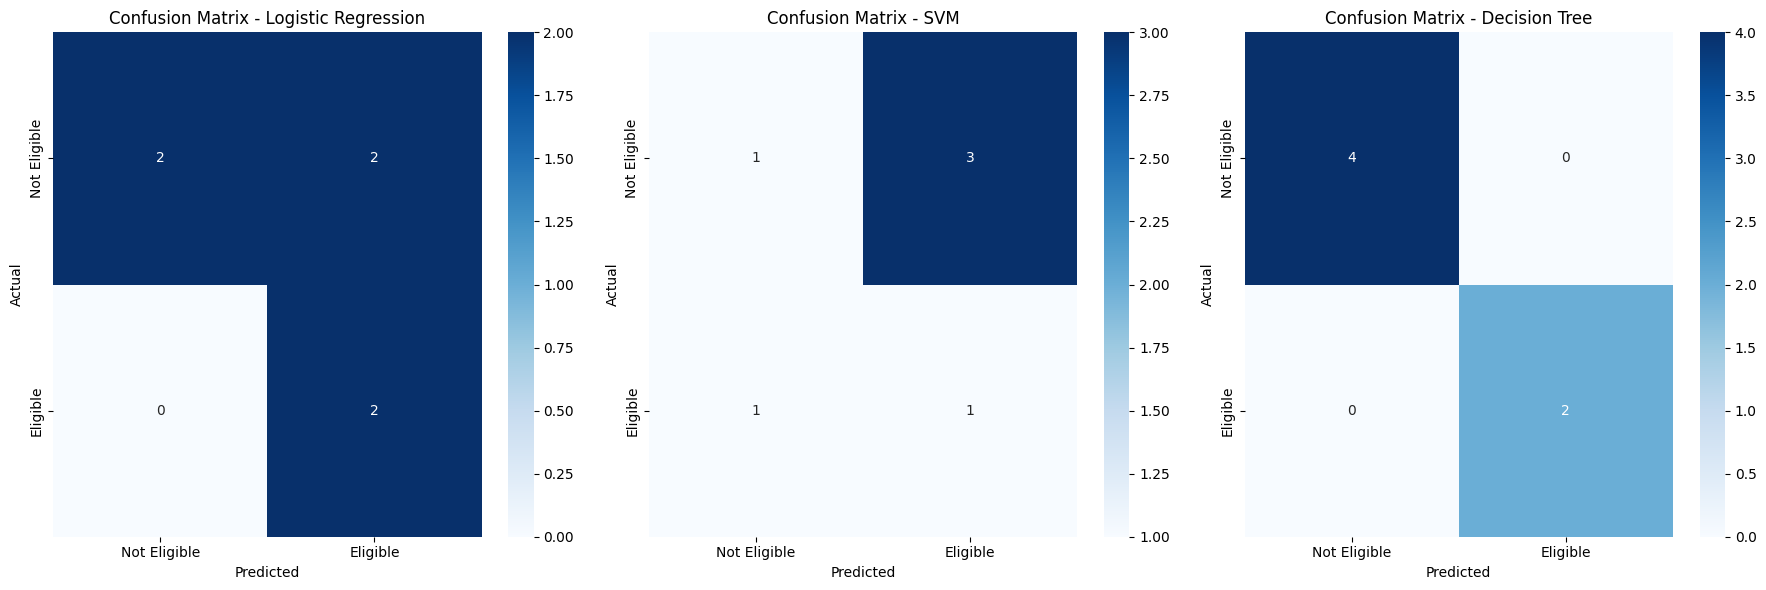

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_test, y_test are your training and testing datasets
# Assuming y_pred_logistic, y_pred_svm, y_pred_decision_tree are the predicted labels

# Plot bar chart to compare precision, recall, F1-score, and accuracy
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
labels = ['Logistic Regression', 'SVM', 'Decision Tree']
classifiers = [y_pred_logistic, y_pred_svm, y_pred_decision_tree]

values = []

for clf in classifiers:
    values.append([
        precision_score(y_test, clf, average='binary', pos_label=1),
        recall_score(y_test, clf, average='binary', pos_label=1),
        f1_score(y_test, clf, average='binary', pos_label=1),
        accuracy_score(y_test, clf),
    ])

bar_width = 0.15
index = np.arange(len(labels))

plt.figure(figsize=(18, 10))

# Plot bar chart
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [value[i] for value in values], bar_width, label=f'{metric.capitalize()}')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Comparison')
plt.xticks(index + 1.5 * bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize confusion matrices
plt.figure(figsize=(18, 6))

for i, clf in enumerate(classifiers):
    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(y_test, clf)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.title(f'Confusion Matrix - {labels[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
